In [1]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes 
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)
import warnings
import json
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [105]:
# Importando a base de dados para o pandas

sms = pd.read_csv("data/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [106]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [107]:
# mais casos negativos (ham) que positivos (spams) 
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [108]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [109]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [110]:
# número de características ou tokens
trained_features = couvec.get_feature_names_out()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 7774
Exemplos de características treinadas: ['000' '008704050406' '0089' '0121' '01223585236' '01223585334'
 '0125698789' '02' '0207']


In [111]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7774)
  (0, 5259)	1
  (0, 6758)	1
  (0, 4426)	1
  (0, 4839)	1
  (0, 902)	1
  (0, 4904)	1
  (0, 4681)	1
  (0, 1647)	1
  (0, 3943)	1
  (0, 1041)	1
  (0, 3659)	1
  (0, 7724)	1
  (0, 5511)	1
  (1, 902)	1
  (1, 4932)	1
  (1, 1421)	1
  (1, 914)	1
  (1, 3668)	1
  (1, 6820)	1
  (1, 4954)	1
  (1, 1106)	1
  (1, 1541)	1


In [112]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7774)


In [113]:
# Construíndo e avaliando o modelo 

# Multimodal Naive Bayes 
# O classificador multimodal Naive Bays é útil para classificar características discretas. 
# (e.g., número de palavras para classificação de textos). 
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [114]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [115]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [116]:
# Acurácia
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.989237668161435

In [117]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, labels_pred)

array([[962,   5],
       [  7, 141]])

In [118]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.9527027027027027
Precisão: 0.9657534246575342


In [119]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [1.00000000e+00 3.19294436e-18]


In [120]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

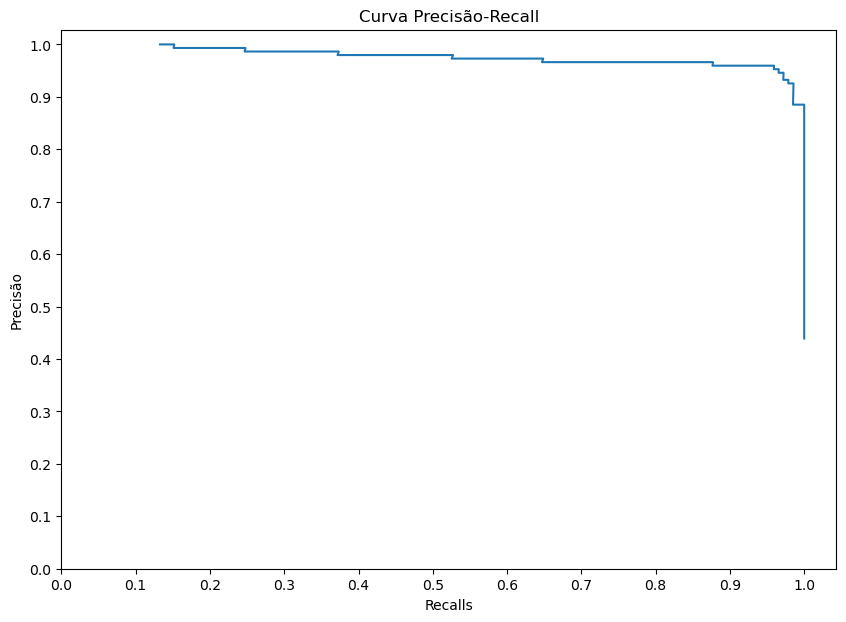

In [121]:
# Plotando a curva precisão-recall 

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()

# Classificação utilizando TensorFlow

Para aprimorar ainda mais o modelo classificador de *spams*, a biblioteca *TensorFlow* será utilizada. Abaixo estão algumas referências nas quais me baseei para a construção desse classificador. Mais especificamente ainda, segui o tutorial disponibilizado no último link, em que o autor utilizou o modelo de linguagem [BERT](https://en.wikipedia.org/wiki/BERT_(language_model)) para otimizar a classificação de *spams*.

- https://www.tensorflow.org/?hl=pt-br
- https://medium.com/swlh/a-beginners-guide-to-text-classification-using-tensorflow-hub-59ba2e6d439c
- https://www.section.io/engineering-education/classification-model-using-bert-and-tensorflow/


# Desempenho
Para comparar o desempenho do modelo antigo e o novo  modelo proposta utilizando TensorFlow, serão realizadas comparações das métricas base de classificação como precisão, revocação, acurácia, *f1-score*, etc. Principalmente, por se tratar de uma classificação binária, a métrica *f1-score* será a principal para comparação, uma vez que ela permite encontrar um bom balanceamento entre precisão e revocação.

# Desenvolvimento
Para uma performance mais otimizada, o código que realiza as computações necessárias foi feito em um arquivo *.py* e executado em uma máquina que acelerou o processo de treinamento. Posteriormente, esste código foi adicionado à este *notebook* (célula abaixo) para fins de entrega e mais fácil análise/leitura/teste.

Assim como proposto pelo tutorial citado, a base de dados foi balanceada, de modo que durante o treinamento e durante o teste, o número de *spams* fosse igual ao número de *hams*.

In [122]:
import numpy as np
import numpy.typing as npt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import sklearn
import json

# constants

RANDOM_STATE: np.int_ = 42
TEST_SIZE: np.float_ = 0.2
EPOCHS: np.int_ = 100

sms: pd.DataFrame = pd.read_csv(
    "data/spam.csv",
    encoding="ISO-8859-1",
    usecols=[0, 1],
    skiprows=1,
    names=["label", "message"],
)

sms.label = sms.label.map({"ham": 0, "spam": 1})

# balanceamento do dataset
df_spam: pd.DataFrame = sms.query("label == 1")
df_ham: pd.DataFrame = sms.query("label == 0")
df_ham_downsampled: pd.DataFrame = df_ham.sample(df_spam.shape[0])
df_balanced: pd.DataFrame = pd.concat([df_ham_downsampled, df_spam])

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["message"],
    df_balanced["label"],
    stratify=df_balanced["label"],
    test_size=TEST_SIZE,
)

bert_preprocess = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
)
bert_encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
)

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs["pooled_output"])
l = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs=[l])
model.summary()

METRICS: list = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)
model.fit(X_train, y_train, epochs=EPOCHS)

y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)

accuracy_score: np.float_ = sklearn.metrics.accuracy_score(y_test, y_pred)
precision_score: npt.NDArray[np.float_] = sklearn.metrics.precision_score(
    y_test, y_pred, average=None, zero_division=0
)
recall_score: npt.NDArray[np.float_] = sklearn.metrics.recall_score(
    y_test, y_pred, average=None, zero_division=0
)
f1_score: npt.NDArray[np.float_] = sklearn.metrics.f1_score(
    y_test, y_pred, average=None
)
confusion_matrix: npt.NDArray[np.int_] = sklearn.metrics.confusion_matrix(
    y_test, y_pred
)

run_info: dict = {
    "accuracy_score": accuracy_score,
    "precision_score": precision_score.tolist(),
    "recall_score": recall_score.tolist(),
    "f1_score": f1_score.tolist(),
    "confusion_matrix": confusion_matrix.tolist(),
    "random_state_seed": RANDOM_STATE,
    "test_size": TEST_SIZE,
    "epochs": EPOCHS,
}

with open("results.json", "w") as file:
    json.dump(run_info, file, indent=4)


# Resultados

In [17]:
with open("data/results.json", "r") as file:
    bert_results: dict = json.load(file)

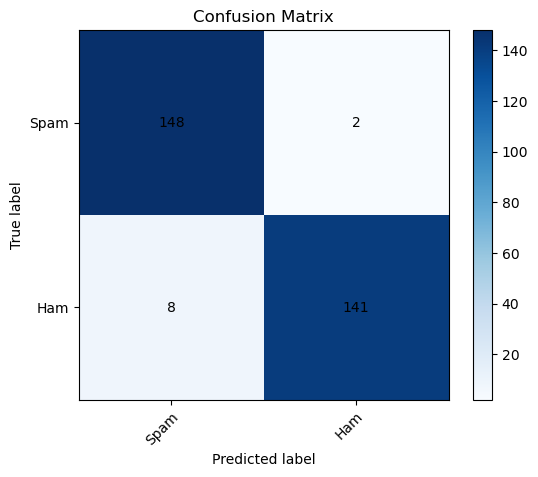

In [24]:
confusion_matrix: np.array = np.array(bert_results["confusion_matrix"])
labels: list[str] = ["Spam", "Ham"]

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap="Blues")

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(
            j, i, confusion_matrix[i, j], ha="center", va="center", color="black"
        )

ax.set_title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

Como podemos ver, a matriz de confusão do modelo criado apresenta excelentes resultados, com sua diagonal preenchida com valores muito altos, e apenas poucos valores estando fora dela. Mais especificamente, vamos analisar agora as métricas de classificação obtidas com o novo modelo que utiliza o BERT.

In [34]:
print(f"Accuracy score: {bert_results['accuracy_score']}")
print(f"Precision score: {np.average(bert_results['precision_score'])}")
print(f"Recall score: {np.average(bert_results['recall_score'])}")
print(f"F1 score: {np.average(bert_results['f1_score'])}")

Accuracy score: 0.9665551839464883
Precision score: 0.9673659673659674
Recall score: 0.9664876957494407
F1 score: 0.9665368430477215


Podemos notar diretamente que o modelo criado possui uma excelente performance, tendo obtidos excelentes métricas durante a classificação. Na tabela abaixo, podemos ver a comparação entre os resultados obtidos com o modelo antigo e os resultados obtidos com o novo modelo que utiliza o BERT.

| Modelo           | Acurácia | Precisão | Recall | F1-Score |
|------------------|----------|----------|--------|----------|
| Antigo (sklearn) | 0.989    | 0.965    | 0.952  | 0.958    |
| Novo (BERT)      | 0.966    | 0.967    | 0.966  | 0.966    |

Nota-se que, apesar do modelo antigo (que utiliza apenas a biblioteca *scikit-learn*) apresentar um melhor resultado em acurácia, ele perde em todas as outras métricas de classificação, inclusive na métrica *F1-Score*, uma das principais para se analisar o desempenho de um modelo classificador binário.

O fato da acurácia ser melhor no modelo anterior, no entanto, não assusta, uma vez que, diferente do que foi feito na nova abordagem, o modelo anterior não balanceou o conjunto de dados, de modo que o número de instância de uma classe eram muito diferentes do que da outra. O *F1-Score*, por levar em consideração em seu modelo tanto a precisão quanto o *recall*, evita quais quer problemas relacionados à isso, principalmente considerando que para a classificação com o BERT as classes estavam balanceadas.

Para sanar quaisquer dúvidas referentes à isso, o modelo de classificação do BERT foi testado também no conjunto de dados não balanceado, com o fito de ver como ele se comportaria nesse caso. Os resultados obtidos nesse cenário podem ser vistos abaixo:

__OBSERVAÇÃO__: o modelo BERT treinado com a base inteira de dados, sem balanceamento, é extremamente lento durante o treino, devido à sua natureza mais complexa. Devido à isso, o código referente à ele não está incluso no *notebook*. No entanto, ele é idêntico ao utilizado anteriomente, com a mudança estando apenas no não balanceamento do conjunto de dados.

In [2]:
with open("data/not_balanced_results.json", "r") as file:
    not_balanced_bert_results: dict = json.load(file)

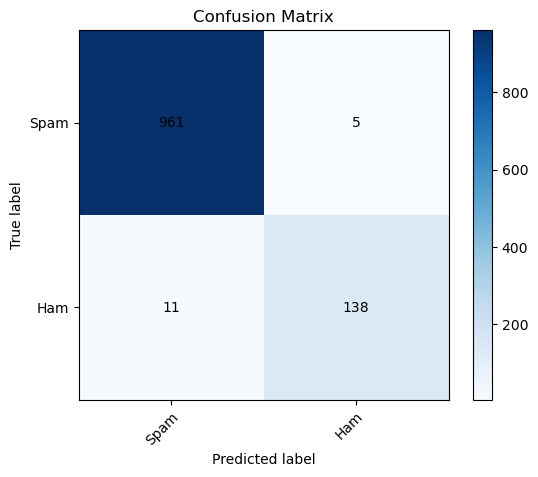

In [3]:
confusion_matrix: np.array = np.array(not_balanced_bert_results["confusion_matrix"])
labels: list[str] = ["Spam", "Ham"]

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap="Blues")

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(
            j, i, confusion_matrix[i, j], ha="center", va="center", color="black"
        )

ax.set_title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

In [4]:
print(f"Accuracy score: {not_balanced_bert_results['accuracy_score']}")
print(f"Precision score: {np.average(not_balanced_bert_results['precision_score'])}")
print(f"Recall score: {np.average(not_balanced_bert_results['recall_score'])}")
print(f"F1 score: {np.average(not_balanced_bert_results['f1_score'])}")

Accuracy score: 0.9856502242152466
Precision score: 0.9768590463034907
Recall score: 0.9604992566037212
F1 score: 0.9684747727497631


A seguinte tabela, então, é construída, considerando os resultados obtidos com o classificador BERT sem balancear as classes no conjunto de treino.

| Modelo           | Acurácia | Precisão | Recall | F1-Score |
|------------------|----------|----------|--------|----------|
| Antigo (sklearn) | 0.989    | 0.965    | 0.952  | 0.958    |
| Novo (BERT)      | 0.966    | 0.967    | 0.966  | 0.966    |
| Novo (BERT) - Não balanceado    | 0.985    | 0.976    | 0.960  | 0.968    |

Pode-se ver que a métrica de *Recall* foi a única com um desempenho ligeiramente pior do que o modelo treinado com um conjunto balanceado, enquanto as outras métricas tiveram um aumento considerável, principalmente a acurácia. Dessa maneira, podemos inferir que para essa base de dados em questão manter as classes desbalanceadas, o que significa mais dados de treino, teve um resultado positivo para o desempenho do modelo.

Em relação ao modelo inicial, feito com a biblioteca *Scikit-Learn*, sua acurácia ainda foi a maior obtida, mas o modelo BERT com o conjunto inteiro de dados a superou em todas as outras métricas. Esse modelo, inclusive, foi o que obteve o maior *F1-Score* dentre todos os criados, o que demonstra seu bom desempenho na classificação de *spams*.